## Random Walks


## Introduction and key equations

We consider the problem of the random motion of a "walker" (a particle, a drunkard, etc.) moving in one dimension (along $x$). At $t=0$, the walker is at $x=0$. At regular intervals (every second, say) it takes one step of length $l$ along $x$, either in the positive (to the right) or the negative (to the left) direction. The direction taken at each step is random, with probabilities $p$ (to the right) and $q=1-p$ (to the left). The simplest case is that with $p=q=0.5$, in which there is symmetry between the left and right directions. A situation with $p \neq q$ may indicate a "bias" in the walker's motion, which could be produced by a gradient in the potential energy (e.g., a drunkard trying to walk on a sloping road, a charged particle in an electric field, etc.). We assume that there is no correlation between the direction at one step and the direction at a previous steps (the walker has no "memory"). Further notation:
* $n_1$, $n_2$: number of steps to the right and to the left
* $N=n_1+n_2$: total number of steps
* $m=n_1-n_2=2n_1-N$: total displacement (in units of $l$).

The motion of an individual walker is totally unpredictable. But, if we consider a large number of such walkers (or the same walker restarting from the origin many times), we have a statistical problem. Thanks to the "law of large numbers", the probabilities of different outcomes become predictable, within a certain ensemble (which should always be defined). Below I give some key results from the probabilistic analysis of such random walks (see Reif for the mathematical derivations).

### Discrete case

The probability of taking $n_1$ steps to the right and $n_2=N-n_1$ steps to the left, in any order, is given by the *binomial distribution*:
$$W_N(n_1) = \frac{N!}{n_1! (N-n_1)!} p^{n_1} q^{N-n_1}
$$
Note that the distribution is nomalized, for all $N$:
$$
\sum_{n_1=0}^N W_N(n_1) = (p+q)^N = 1
$$
It can be proven that mean number of right steps is:
$$
\overline{n_1} = \sum_{n_1=0}^N W_N(n_1)n_1 = Np
$$
and the mean overall displacement is:
$$
\overline{m} = N(p-q)
$$

The variance or dispersion in the number of right steps is defined as:
$$
\overline{ \left( \Delta n_1 \right)^2 } = \overline{(n_1-\overline{n_1})^2} = \overline{n_1^2} - \overline{n_1}^2 
$$
This is equal to:
$$
\overline{ \left( \Delta n_1 \right)^2 } = Npq 
$$
The variance in the overall displacement is then given by:
$$
\overline{ \left( \Delta m \right)^2 } = 4 \overline{ \left( \Delta n_1 \right)^2 } = 4Npq 
$$

### Continous case

We now consider the situation with $N>>1$ (large number of steps). We assume that each step is small, in comparison with the shortest length scale of interest: $l<<dx$. In this case, the net displacement $x=ml$ can be treated as a continous variable.

The probability that walker's displacement is between $x$ and $x+dx$ is given by the Gaussian distribution:
\begin{equation*}
\mathcal{P}(x)dx = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right] dx .
\end{equation*}
where:
\begin{align*}
\mu & \equiv & (p-q)Nl \\
\sigma & \equiv & 2 \sqrt{Npq} l \\
\end{align*}
Note that, while $W_N(n_1)$ is a probability, $\mathcal{P}(x)$ is a *probability density*: it must be multiplied by a small interval $dx$ (or integrated over a larger integral) in order to obtain an actual probability.

The distribution is normalized and has the following properties:
\begin{align*}
\int_{-\infty}^{+\infty} \mathcal{P}(x)dx &=& 1 \\
\overline{x} \equiv \int_{-\infty}^{+\infty} x \mathcal{P}(x)dx &=& \mu \\
\overline{(\Delta x)^2} \equiv \overline{(x-\overline{x})^2} = \int_{-\infty}^{+\infty} (x-\mu)^2 \mathcal{P}(x)dx &=& \sigma^2 \, . \\
\end{align*}



## Simulating a random walk in 1D

This is a simple Python code which perfoms the simulation of a random walk. The code assumes that the step length is $l=1$.

No. of steps, p and q:   20, 0.5, 0.5
Total number or walkers: 1000
mu and xaver:            0.0, 0.034
sigma and xvar:          4.47213595499958, 4.589863178788669
[0.         0.0015373  0.00461189 0.03597274 0.08639608 0.05103825
 0.08332148 0.0362802  0.00707156 0.00122984 0.        ]


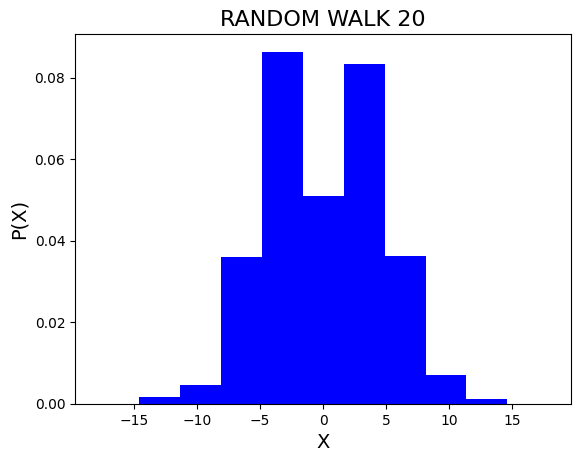

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# Define the number of repetitions (the size of the statistical ensemble)
M = 1000
# Define the number of steps to be taken
N = 20
# Define the probability of a step to the right or to the left
p = 0.5
q = 1-p

# Set up the RW array to accumulate the statistics final coordinates of the walker.
RW = np.zeros(M)

# The simulation goes on here
rng = np.random.default_rng(23456) # The "random" is initialized by a seed.
for walker in range(M):
    x = 0.0
    for step in range(N):
        # extract a random number, on the [0,1) interval
        r = rng.random()
        # Take a step to the right if r<p, a step to the left if r>= p
        if (r<p):
            x = x+1.0
        else:
            x = x-1.0
    # At the end of the walk, record the final position of the walker.
    RW[walker] = x

# Compute the average and variance
# (note: here we could also have used numpy's built-in functions).
xaver = 0.0
for x in RW:
    xaver += x
xaver /= M
xvar2 = 0.0
for x in RW:
    xvar2 += (x-xaver)**2
xvar2 /= M    
xvar = xvar2**0.5
# These are the expected values, on the basis of the theory
mu = N*(p-q)
sigma = (4*N*p*q)**0.5

# Print out and plot the results
print("No. of steps, p and q:   " + str(N)+", "+str(p)+", "+str(q) )
print("Total number or walkers: " + str(M) )
print("mu and xaver:            " + str(mu)+", "+str(xaver) )
print("sigma and xvar:          " + str(sigma)+", "+str(xvar) )

# Obtain the histogram "manually"
hbins = 11
hrange=[mu-4*sigma,mu+4*sigma]
delta = (hrange[1]-hrange[0])/hbins
myhisto = np.zeros(hbins)
nout = 0
for x in RW:
    ibin = int((x-hrange[0]) / delta)
#   Use Python's "try...except" construct to avoid the failure of the program,
#   in case a random walker ended out of the bounds allocated for the histogram.
    try:
        myhisto[ibin] += 1
    except IndexError:
        nout += 1
        print("RW point out of bounds, skipping this one:", x)
        
# Normalize the distribution, dividing by the number of valid points and the width of intervals (delta).
myhisto /= (M-nout)*delta
# This should agree with plotted histogram, below....
print(myhisto)

# Plot the results as a histogram. Pyplot has a built-in function to do it.
# The histogram might display some asymmetry, depending also of the odd/even number of bins.
# Note that, if we use an even/odd number of steps N, the end point will always be at an even/odd coordinate.
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.hist( RW, density=True, bins=hbins, range=hrange, color="b", align="mid" )
ax.set_xlabel('X', size=14)
ax.set_ylabel('P(X)', size=14)
ax.set_title("RANDOM WALK "+str(N), size=16)
fig.savefig("RandomWalk1D"+'.pdf')


## Extensions, questions, further work

Here are a few ideas:
* Find out how to fit a Gaussian function to a simulated distribution, and plot it on top of it so as to compare them.
* Modify the code, so as to introduce some correlation between one step and the previous one. For example: the probability of moving to the right is equal to $p+\delta$ if the previous step was also to the right, to $p-\delta$ if the previous step was to the left ($\delta$ has to be smaller than both $p$ an $q$, so as not to produce absurd results). Observe how this change affects the final distribution.
* Define it a certain range of allowed $x$ values, and use it in combination with different "boundary conditions":
    * "wall": when a walker reaches one end of the allowed range of $x$, it does not exit it but it is "bounced back"
    * "periodic": when a walker reaches one end of the allowed range of $x$, it appears on the other end (as if it was walking on a circle).
* Generalize the program to produce a random walk in two or three dimensions. At each time, a diffusing particle may take a random step along the $x$, $y$ or the $z$ directions.

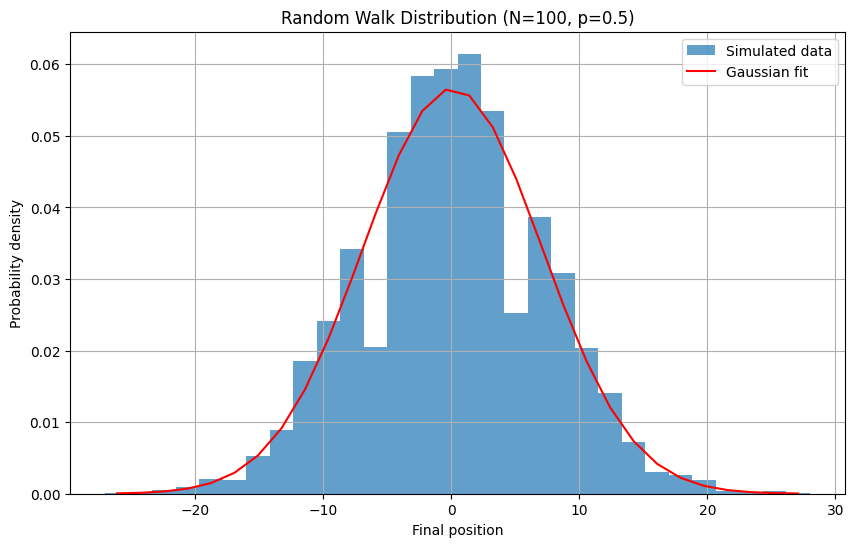

Fitted parameters: A=0.0566, mu=0.1145, sigma=6.9931
Expected mu: 0.0000
Expected sigma: 10.0000


In [2]:
#@title Random Walk with Gaussian Fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Parameters
M = 10000  # Number of walkers
N = 100    # Number of steps
p = 0.5    # Probability of moving right

# Simulate random walks
rng = np.random.default_rng(12345)
final_positions = np.sum(rng.random((M, N)) < p, axis=1) - np.sum(rng.random((M, N)) >= p, axis=1)

# Create histogram
hist, bin_edges = np.histogram(final_positions, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit Gaussian function
popt, _ = curve_fit(gaussian, bin_centers, hist, p0=[1, 0, np.sqrt(N)])

# Plot results
plt.figure(figsize=(10, 6))
plt.hist(final_positions, bins=30, density=True, alpha=0.7, label='Simulated data')
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Gaussian fit')
plt.xlabel('Final position')
plt.ylabel('Probability density')
plt.title(f'Random Walk Distribution (N={N}, p={p})')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: A={popt[0]:.4f}, mu={popt[1]:.4f}, sigma={popt[2]:.4f}")
print(f"Expected mu: {N * (2*p - 1):.4f}")
print(f"Expected sigma: {np.sqrt(4 * N * p * (1-p)):.4f}")

# Correlated Random Walk: Theoretical Considerations

## Introduction

In this study, we explore the correlated random walk model, a variation of the classic random walk. By introducing a dependency between consecutive steps, we can examine how short-term memory or inertia influences the system's overall behavior. This model offers insights into various fields, including physics and finance, where the effects of correlation can have significant impacts.

## Model Description

In the correlated random walk model, a walker starts at the origin, $ x = 0 $. At each step, the walker moves either right (+1) or left (-1). However, unlike in a classic random walk, the probability of moving right is influenced by the direction of the previous step. If the previous step was to the right, the probability of moving right increases by $ \delta $. Conversely, if the previous step was to the left, the probability of moving right decreases by $ \delta $. Here, $ \delta $ represents the strength of the correlation between steps, reflecting the degree of persistence or reversal in the walker's movement.

## Theoretical Expectations

When there is no correlation ($ \delta = 0 $), the model behaves as a classic random walk. For a large number of steps ($ N $), the final positions of the walkers are expected to approximate a normal distribution due to the Central Limit Theorem. The mean final position should be close to zero, and the standard deviation of the final positions should be proportional to $ \sqrt{N} $, indicating how widely the walkers are expected to spread out over time.

When introducing correlation ($ \delta > 0 $), the walk is modified in several ways. The distribution of final positions will still be approximately normal for a large number of steps, but the mean final position should remain close to zero if the starting conditions are symmetric. However, the standard deviation of the final positions will increase compared to the uncorrelated case, reflecting the increased persistence in the walker's movements. This means that walkers are more likely to continue moving in the same direction, leading to a broader spread of final positions.

## Expected Plot Characteristics

When plotting the distributions for different values of $ \delta $, all distributions should be centered around zero. As $ \delta $ increases, the distributions will become wider, indicating a larger standard deviation. The peaks of the distributions will become lower to maintain the same total area under the curve. The uncorrelated case ($ \delta = 0 $) will exhibit the narrowest distribution, while stronger correlations (larger $ \delta $) will result in fatter tails, representing a higher probability of extreme outcomes.

## Theoretical Implications

The introduction of correlation in the random walk model has several intriguing implications. Positive correlation ($ \delta > 0 $) introduces a tendency for the walker to continue in the same direction, mimicking inertia or momentum observed in physical systems. This leads to an increased rate of diffusion, as the walkers spread out more quickly. Additionally, stronger correlations increase the likelihood of reaching positions far from the origin, modeling phenomena where small biases can lead to significant long-term effects. Furthermore, the correlation introduces a characteristic time scale to the system, allowing for the modeling of systems with both short-term memory and long-term randomness.

By comparing simulation results with these theoretical expectations, we can assess how well the model captures the essence of correlated random processes. This model has potential applications across various fields, from understanding physical systems to financial modeling, where short-term dependencies can significantly influence long-term outcomes.

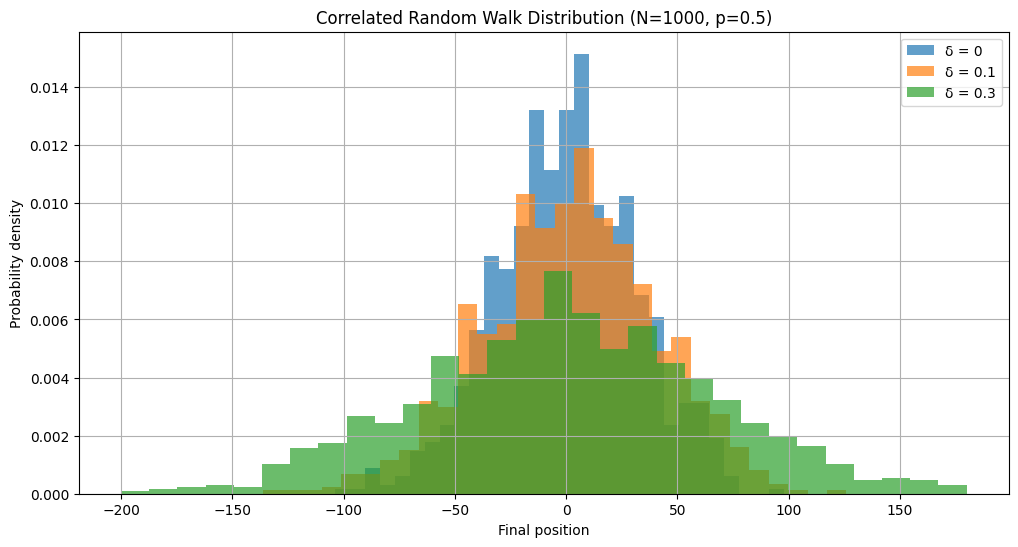

δ = 0:
  Mean: 0.3400
  Std Dev: 31.0720
δ = 0.1:
  Mean: 1.5820
  Std Dev: 38.5232
δ = 0.3:
  Mean: -0.3340
  Std Dev: 64.5235


In [2]:
#@title Random Walk with step correlation
import numpy as np
import matplotlib.pyplot as plt

def correlated_random_walk(N, p, delta, M=1000):
    rng = np.random.default_rng(12345)
    final_positions = np.zeros(M)
    
    for i in range(M):
        x = 0
        prev_step = 0
        for _ in range(N):
            if prev_step == 1:
                p_right = min(1, max(0, p + delta))
            elif prev_step == -1:
                p_right = min(1, max(0, p - delta))
            else:
                p_right = p
            
            step = 1 if rng.random() < p_right else -1
            x += step
            prev_step = step
        
        final_positions[i] = x
    
    return final_positions

# Parameters
N = 1000  # Number of steps
p = 0.5   # Base probability of moving right
deltas = [0, 0.1, 0.3]  # Correlation strengths

plt.figure(figsize=(12, 6))

for delta in deltas:
    final_positions = correlated_random_walk(N, p, delta)
    plt.hist(final_positions, bins=30, density=True, alpha=0.7, label=f'δ = {delta}')

plt.xlabel('Final position')
plt.ylabel('Probability density')
plt.title(f'Correlated Random Walk Distribution (N={N}, p={p})')
plt.legend()
plt.grid(True)
plt.show()

for delta in deltas:
    final_positions = correlated_random_walk(N, p, delta)
    print(f"δ = {delta}:")
    print(f"  Mean: {np.mean(final_positions):.4f}")
    print(f"  Std Dev: {np.std(final_positions):.4f}")

# Random Walks with Boundary Conditions: Theoretical Insights

## Introduction

In this exploration, we delve into random walks under various boundary conditions to model systems with spatial constraints or periodic structures. These models provide valuable insights into numerous physical and biological phenomena, from molecular diffusion to animal foraging behavior. By examining how boundary conditions affect random walks, we can better understand the behavior of systems that encounter physical limitations.

## Types of Boundary Conditions

We consider three primary types of boundary conditions in our study:

1. **No Boundary**: This is the classic random walk in an unlimited space, where the walker can move freely in any direction without constraints.
2. **Wall Boundary**: In this scenario, the walker is confined within a specific range. When it reaches the boundary, it reflects back into the allowed space.
3. **Periodic Boundary**: Here, the walker moves on a circular path. Crossing one edge of the range results in reappearing at the opposite edge, simulating a continuous loop.

## Theoretical Expectations

### No Boundary Condition

In a random walk with no boundary conditions, each step is independent, leading to a position distribution that approaches a normal distribution as the number of steps (N) increases. This phenomenon is explained by the Central Limit Theorem. The mean position of the walker is expected to remain close to the starting point, typically zero, because steps in all directions tend to cancel each other out over time. The standard deviation of the walker's position grows proportionally to the square root of the number of steps (√N), indicating that the spread of the walk increases with more steps.

### Wall Boundary Condition

When a random walk is confined by wall boundaries, the position distribution becomes non-Gaussian with peaks near the boundaries. This happens because the walker accumulates near the walls after multiple reflections. The mean position tends to be near the center of the allowed range, due to the symmetric nature of the confinement. The standard deviation is limited by the boundary range, as the walker cannot move beyond the walls, which confines the spread of the positions.

### Periodic Boundary Condition

In the case of periodic boundary conditions, the walker's position can eventually become uniformly distributed over the entire range for a large number of steps. This is because the walker has an equal probability of being at any point on the circular path. The mean position is less meaningful due to the circular nature of the space, but theoretically, it should be at the center of the range. The standard deviation is limited by the boundary range, but it behaves differently from the wall boundary condition since the walker can re-enter from the opposite edge, avoiding reflections.

## Expected Plot Characteristics

The study generates several plots to visualize the behavior of random walks under different boundary conditions. For the no boundary condition, the final position histogram is expected to be bell-shaped, centered at zero, reflecting a normal distribution. With wall boundaries, the histogram flattens, showing increased density near the walls due to reflections. For periodic boundaries, the histogram should be more uniform, indicating an equal probability across the loop.

Example trajectories for each boundary condition also offer insights. In an unlimited space, the walker's movement is unrestricted, potentially covering large distances. With wall boundaries, trajectories reflect off the boundaries, highlighting the confinement. In a periodic boundary, trajectories wrap around at the edges, creating a continuous loop.



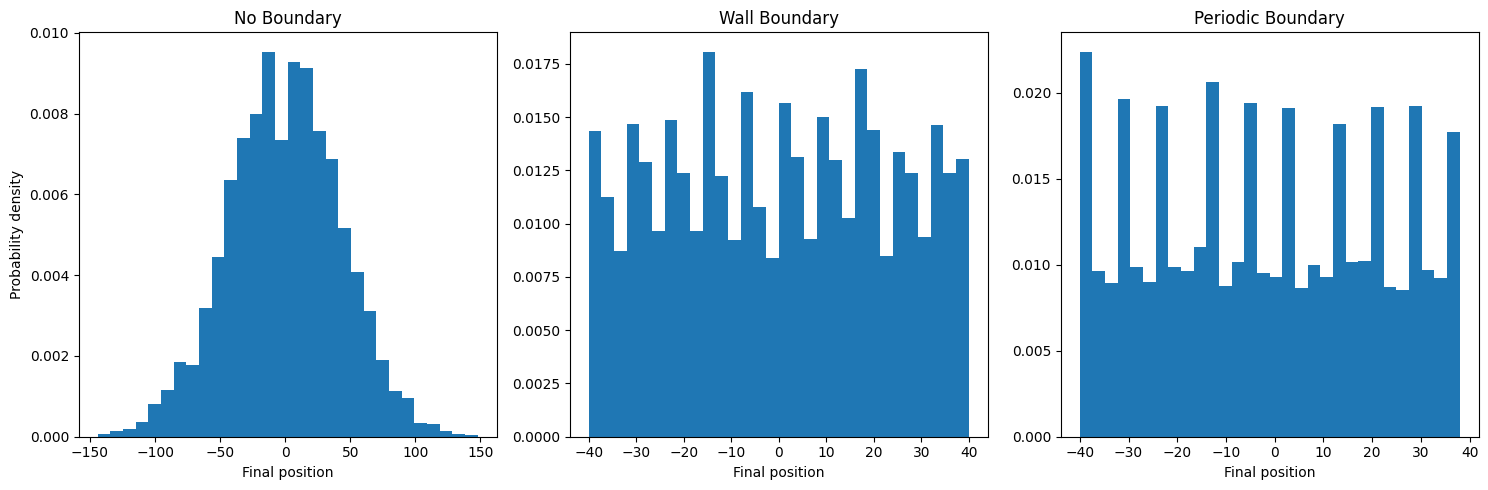

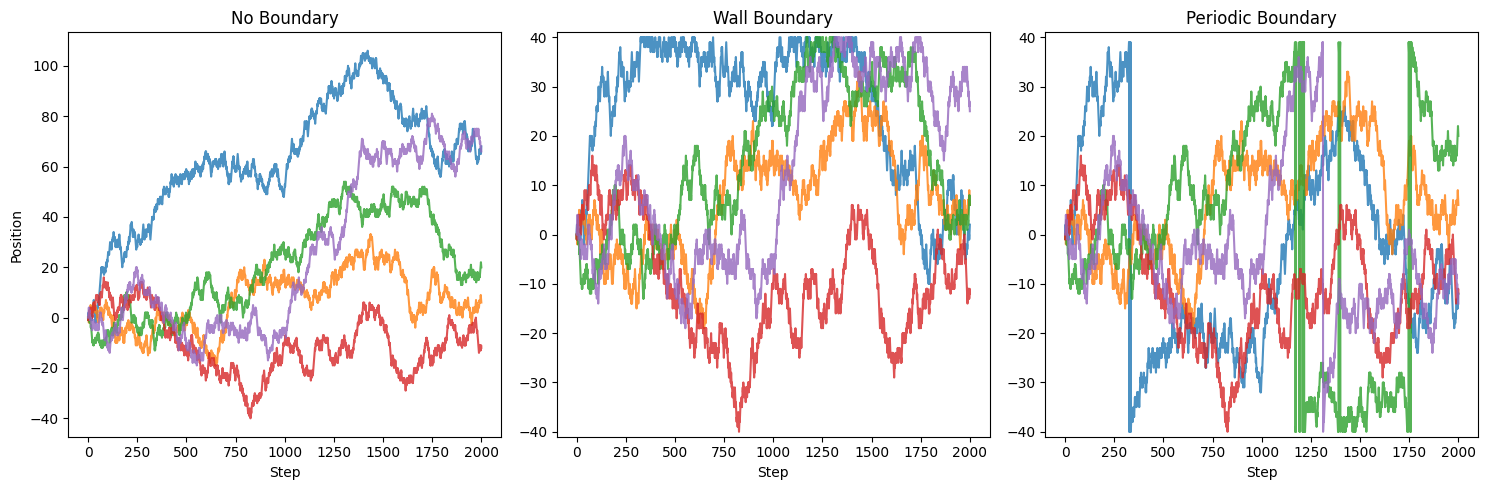

In [1]:
#@title Random Walk with Boundary Conditions
import numpy as np
import matplotlib.pyplot as plt

def random_walk_with_boundaries(N, p, boundary_type, boundary_range, M=5000):
    rng = np.random.default_rng(12345)
    trajectories = np.zeros((M, N+1))
    
    for i in range(M):
        x = 0
        for j in range(1, N+1):
            step = 1 if rng.random() < p else -1
            x += step
            
            if boundary_type == 'wall':
                x = min(max(x, -boundary_range), boundary_range)
            elif boundary_type == 'periodic':
                x = (x + boundary_range) % (2 * boundary_range) - boundary_range
            
            trajectories[i, j] = x
    
    return trajectories

# Parameters
N = 2000  # Number of steps
p = 0.5   # Probability of moving right
boundary_range = 40

# Simulate random walks with different boundary conditions
no_boundary = random_walk_with_boundaries(N, p, 'none', np.inf)
wall_boundary = random_walk_with_boundaries(N, p, 'wall', boundary_range)
periodic_boundary = random_walk_with_boundaries(N, p, 'periodic', boundary_range)

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(no_boundary[:, -1], bins=30, density=True)
plt.title('No Boundary')
plt.xlabel('Final position')
plt.ylabel('Probability density')

plt.subplot(132)
plt.hist(wall_boundary[:, -1], bins=30, density=True)
plt.title('Wall Boundary')
plt.xlabel('Final position')

plt.subplot(133)
plt.hist(periodic_boundary[:, -1], bins=30, density=True)
plt.title('Periodic Boundary')
plt.xlabel('Final position')

plt.tight_layout()
plt.show()

# Plot example trajectories
plt.figure(figsize=(15, 5))

plt.subplot(131)
for i in range(5):
    plt.plot(no_boundary[i], alpha=0.8)
plt.title('No Boundary')
plt.xlabel('Step')
plt.ylabel('Position')

plt.subplot(132)
for i in range(5):
    plt.plot(wall_boundary[i], alpha=0.8)
plt.title('Wall Boundary')
plt.xlabel('Step')
plt.ylim(-boundary_range-1, boundary_range+1)

plt.subplot(133)
for i in range(5):
    plt.plot(periodic_boundary[i], alpha=0.8)
plt.title('Periodic Boundary')
plt.xlabel('Step')
plt.ylim(-boundary_range-1, boundary_range+1)

plt.tight_layout()
plt.show()


# Random Walks in 2D and 3D: A Visual Exploration

## Expected Plots

In the 2D random walk plot, we expect to see multiple paths originating from the point (0,0). As the walkers take random steps, their paths should spread out in all directions, forming a roughly circular pattern around the origin. This dispersion illustrates the inherent randomness of the process. Some paths may wander far from the origin, while others stay closer, highlighting the variability in the walker's journeys.

In the 3D random walk plot, the paths will spread out in three dimensions. This creates a shape that resembles a sphere centered at the origin. The additional dimension in 3D means the paths may appear less dense than in the 2D plot, but the fundamental behavior remains consistent. The walkers explore space more freely, with their movements filling the volume rather than just an area.

## Interpretation

The random nature of the walks is evident in the irregularity of the paths. Each walker's trajectory appears unpredictable, but the overall statistical properties—such as the mean position and standard deviation—should align with theoretical expectations. For both 2D and 3D walks, the mean final position is expected to be near the origin, reflecting the unbiased nature of the random steps.

The standard deviation of the final positions increases with the square root of the number of steps, indicating how widely the walkers are expected to spread out over time. In 3D walks, the additional degree of freedom allows for greater exploration, which may result in slightly larger average distances from the origin compared to 2D walks.

As the number of steps increases, the distribution of final positions should increasingly resemble a normal distribution. This outcome demonstrates the Central Limit Theorem, which predicts that the sum of a large number of independent, random variables will tend to follow a normal distribution, regardless of the original distributions of the variables.

This simulation provides both a visual and statistical understanding of random walk behavior. It effectively demonstrates key concepts in statistical physics and probability theory, showing how simple, random processes can lead to complex but statistically predictable outcomes. This principle is foundational to many natural and social phenomena, offering insights into how randomness and order coexist in various systems.

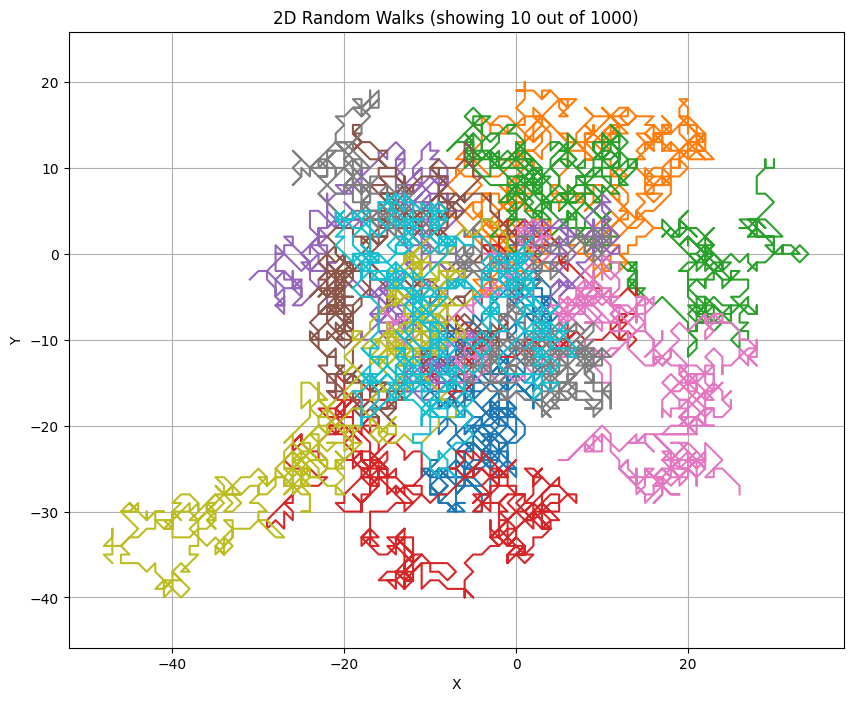

2D Random Walk Analysis:
Mean final position: [ 0.579 -2.013]
Standard deviation of final positions: [25.83117804 26.07970151]
Mean distance from origin: 32.45735141880024
Standard deviation of distances: 17.27160498843422




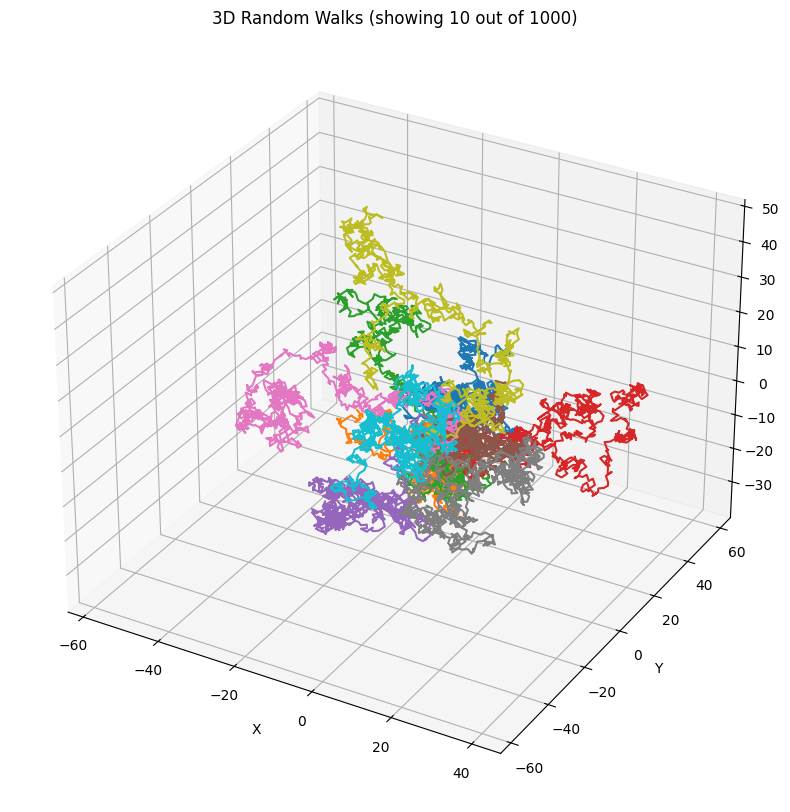

3D Random Walk Analysis:
Mean final position: [-1.313  0.09  -0.951]
Standard deviation of final positions: [26.24158972 25.65618639 25.49934507]
Mean distance from origin: 41.24138215367648
Standard deviation of distances: 17.287637144919927


In [5]:
#@ 3-D Random Walk
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def random_walk_nd(n_steps, n_walkers, dimensions=2):
    """
    Perform a random walk in 2D or 3D.
    
    Parameters:
    - n_steps: Number of steps for each walker
    - n_walkers: Number of walkers to simulate
    - dimensions: 2 for 2D, 3 for 3D
    
    Returns:
    - An array of shape (n_walkers, dimensions, n_steps+1) containing the positions at each step
    """
    # Initialize the walks
    walks = np.zeros((n_walkers, dimensions, n_steps+1))
    
    # Generate random steps: -1, 0, or 1 in each dimension
    steps = np.random.randint(-1, 2, size=(n_walkers, dimensions, n_steps))
    
    # Cumulative sum to get the walk positions
    walks[:, :, 1:] = np.cumsum(steps, axis=2)
    
    return walks

def plot_2d_walks(walks, max_plots=10):
    """Plot 2D random walks"""
    plt.figure(figsize=(10, 8))
    for walk in walks[:max_plots]:
        plt.plot(walk[0], walk[1])
    plt.title(f'2D Random Walks (showing {min(max_plots, len(walks))} out of {len(walks)})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def plot_3d_walks(walks, max_plots=10):
    """Plot 3D random walks"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    for walk in walks[:max_plots]:
        ax.plot(walk[0], walk[1], walk[2])
    ax.set_title(f'3D Random Walks (showing {min(max_plots, len(walks))} out of {len(walks)})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def analyze_walks(walks):
    """Analyze the final positions of the walks"""
    final_positions = walks[:, :, -1]
    mean_position = np.mean(final_positions, axis=0)
    std_position = np.std(final_positions, axis=0)
    
    print(f"Mean final position: {mean_position}")
    print(f"Standard deviation of final positions: {std_position}")
    
    # Calculate distance from origin for each walk
    distances = np.linalg.norm(final_positions, axis=1)
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    
    print(f"Mean distance from origin: {mean_distance}")
    print(f"Standard deviation of distances: {std_distance}")

# Simulation parameters
n_steps = 1000
n_walkers = 1000

# 2D Random Walk
walks_2d = random_walk_nd(n_steps, n_walkers, dimensions=2)
plot_2d_walks(walks_2d)
print("2D Random Walk Analysis:")
analyze_walks(walks_2d)

print("\n" + "="*50 + "\n")

# 3D Random Walk
walks_3d = random_walk_nd(n_steps, n_walkers, dimensions=3)
plot_3d_walks(walks_3d)
print("3D Random Walk Analysis:")
analyze_walks(walks_3d)

# More on Correlated Random Walks: Theory and Applications

## Introduction

A correlated random walk is a mathematical model where each step is influenced by the previous one, either positively (continuing in the same direction) or negatively (reversing direction). These models are crucial in fields such as polymer chain modeling and particle diffusion in complex media, offering insights into systems where short-term memory or correlation plays a significant role.

## Theoretical Background

In a standard random walk, each step is independent of the others. However, many real-world scenarios involve some "memory" or correlation between steps. The correlated random walk model captures this behavior, with the correlation factor ranging from -1 to 1. Positive correlation means the walker tends to continue in the same direction, while negative correlation means the walker tends to reverse direction. When there is no correlation, the model reduces to a standard random walk.

## Applications

### Polymer Chains

Polymer chains can be effectively modeled using positively correlated random walks. Each step represents a monomer in the chain, with positive correlation reflecting the tendency of adjacent monomers to align due to chemical bonds and intermolecular forces. This results in walks that are more extended and less coiled compared to uncorrelated random walks, capturing the intrinsic stiffness or persistence length of the polymer chain.

### Particles in a Glassy Medium

Particles diffusing in a glassy medium can be modeled using negatively correlated random walks or a modified random walk with "cages." The negative correlation or caging effect represents the tendency of particles to be trapped in local energy minima formed by surrounding particles. These walks exhibit periods of confined motion within cages, interspersed with larger jumps when the particle escapes a cage, reflecting the complex dynamics of particles in glassy materials.

## Implementation Details

The provided code implements these concepts through two main functions. The `correlated_random_walk` function generates a correlated random walk in one, two, or three dimensions, with the correlation parameter adjusting the probability of continuing in the same direction. The `simulate_glassy_medium` function simulates a particle in a glassy medium using a cage model, where the cage size determines the size of confinement regions, and the escape probability is the likelihood of the particle escaping its current cage.

## Expected Results

### Polymer Chains (Positive Correlation)

Walks should appear more stretched out and less coiled, reflecting the alignment of monomers. The Mean Square Displacement (MSD) should increase more rapidly than in an uncorrelated walk, indicating faster diffusion due to the persistent motion.

### Particles in a Glassy Medium (Negative Correlation)

Walks should appear more confined with frequent direction changes, reflecting the caging effect. The MSD should increase more slowly than in an uncorrelated walk, indicating slower diffusion due to the frequent reversals in direction.

### Glassy Medium with Cages

Walks should display step-like patterns, with periods of confined motion followed by sudden jumps. The MSD should show a characteristic plateau at intermediate timescales, followed by a transition to normal diffusion at longer timescales, capturing the dynamics of particles transitioning between confined and free motion.

## Interpretation of Plots

The code generates four types of plots to visualize these phenomena. For polymer chains, the paths should appear extended and less tangled. For particles in a glassy medium, the paths should show more confined, back-and-forth motion. For particles in a glassy medium with cages, the paths should show step-like patterns in one dimension. The MSD plots should reveal faster-than-linear growth for polymer chains, slower growth for particles in a glassy medium, and a plateau followed by linear growth for particles in a glassy medium with cages.



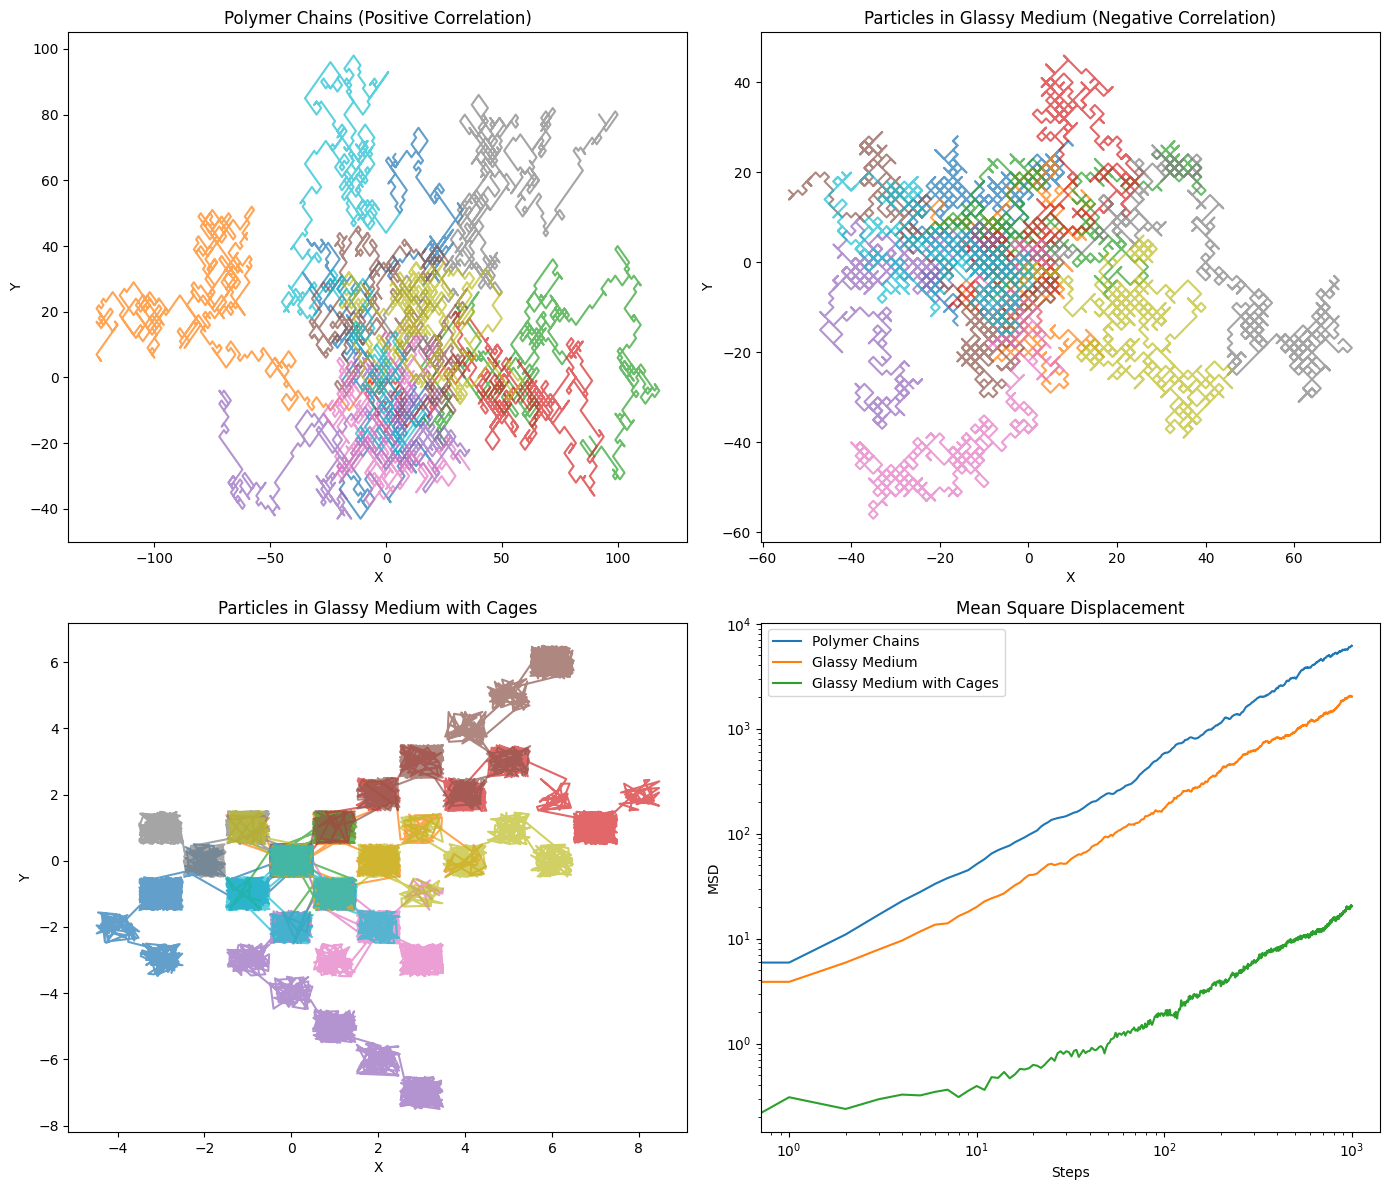

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a correlated random walk
def correlated_random_walk(n_steps, correlation, p=0.5, dimension=1):
    steps = np.random.choice([-1, 1], size=(n_steps, dimension), p=[p, 1-p])
    for i in range(1, n_steps):
        for j in range(dimension):
            if np.random.rand() < correlation:
                steps[i, j] = steps[i-1, j]
    return np.cumsum(steps, axis=0)

# Function to simulate a glassy medium
def simulate_glassy_medium(n_steps, cage_size, escape_prob):
    position = np.zeros((n_steps, 2))
    cage_position = np.zeros(2)
    
    for i in range(1, n_steps):
        if np.random.rand() < escape_prob:
            cage_position += np.random.choice([-cage_size, cage_size], size=2)
        position[i] = cage_position + np.random.uniform(-cage_size/2, cage_size/2, size=2)
    
    return position

# Simulation parameters
n_steps = 1000
n_walks = 100

# Simulate polymer chain (positive correlation in 2D)
polymer_chains = [correlated_random_walk(n_steps, correlation=0.5, dimension=2) for _ in range(n_walks)]

# Simulate particles in glassy medium (negative correlation in 2D)
glassy_particles = [correlated_random_walk(n_steps, correlation=-0.3, dimension=2) for _ in range(n_walks)]

# Simulate glassy medium with cages
glassy_cages = [simulate_glassy_medium(n_steps, cage_size=1.0, escape_prob=0.01) for _ in range(n_walks)]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Polymer Chains
for walk in polymer_chains[:10]:
    axs[0, 0].plot(walk[:, 0], walk[:, 1], alpha=0.7)
axs[0, 0].set_title('Polymer Chains (Positive Correlation)')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')

# Particles in Glassy Medium
for walk in glassy_particles[:10]:
    axs[0, 1].plot(walk[:, 0], walk[:, 1], alpha=0.7)
axs[0, 1].set_title('Particles in Glassy Medium (Negative Correlation)')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')

# Particles in Glassy Medium with Cages
for walk in glassy_cages[:10]:
    axs[1, 0].plot(walk[:, 0], walk[:, 1], alpha=0.7)
axs[1, 0].set_title('Particles in Glassy Medium with Cages')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')

# Mean Square Displacement
def calculate_msd(walks):
    msd = np.zeros(n_steps)
    for walk in walks:
        msd += np.sum(walk**2, axis=1)
    return msd / len(walks)

msd_polymer = calculate_msd(polymer_chains)
msd_glassy = calculate_msd(glassy_particles)
msd_cages = calculate_msd(glassy_cages)

axs[1, 1].loglog(msd_polymer, label='Polymer Chains')
axs[1, 1].loglog(msd_glassy, label='Glassy Medium')
axs[1, 1].loglog(msd_cages, label='Glassy Medium with Cages')
axs[1, 1].set_title('Mean Square Displacement')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('MSD')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# Quantum Walk

# Advanced 3D Quantum Walk Simulation: Theory and Implementation

## Introduction

The provided code simulates an advanced 3D quantum walk involving multiple interacting particles in a complex molecular environment. This simulation integrates various sophisticated quantum mechanical concepts and numerical techniques to model quantum particle behavior realistically. Here, we break down the key components and theoretical concepts behind this implementation.

## Theoretical Background

### Quantum Walks

Quantum walks are the quantum mechanical equivalent of classical random walks, where a particle's position is described by a quantum superposition of states. This allows the particle to explore multiple paths simultaneously, resulting in different propagation characteristics, such as faster spreading and unique interference patterns, compared to classical random walks.

### Multi-Particle Systems

The simulation involves multiple quantum particles, introducing the concepts of entanglement and inter-particle interactions. In quantum mechanics, a multi-particle system's state is described by a wavefunction in a higher-dimensional Hilbert space, with the dimensionality growing exponentially with the number of particles.

### Hamiltonian and Time Evolution

The Hamiltonian operator, which describes the system's total energy and governs its time evolution, is central to the quantum simulation. The Hamiltonian in this implementation includes terms for kinetic energy (nearest-neighbor hopping in the tight-binding approximation), potential energy (a custom function modeling the molecular environment), inter-particle interactions, and an external time-dependent field simulating an applied electromagnetic field.

The Schrödinger equation governs the time evolution of the quantum state:

$$ i\hbar \frac{\partial \psi}{\partial t} = H\psi $$

where $\psi$ is the wavefunction, $t$ is time, $\hbar$ is the reduced Planck's constant, and $H$ is the Hamiltonian operator.

### Decoherence

The simulation includes a decoherence term to model the quantum system's interaction with its environment, causing the quantum superposition to decay over time and transitioning the system from quantum to classical behavior.

## Implementation Details

### Spatial Discretization

The 3D space is discretized into a grid, allowing for numerical computation, with each grid point representing a possible particle position.

### Hamiltonian Construction

The Hamiltonian is constructed as a sparse matrix for computational efficiency, incorporating:
- Kinetic energy terms through nearest-neighbor couplings.
- Potential energy terms from the custom molecular potential.
- Inter-particle interaction terms.
- Time-dependent external field effects.

### Custom Molecular Potential

A Lennard-Jones type potential models the interaction between the quantum particles and the molecular structure (e.g., a water molecule), capturing both short-range repulsion and long-range attraction characteristic of molecular interactions.

### Time Evolution

Time evolution is computed using SciPy's `solve_ivp` function, which implements adaptive step-size integration methods for ordinary differential equations (ODEs). The quantum walk is formulated as an ODE in the Schrödinger picture.

### Performance Optimization

Numba's just-in-time compilation (`@numba.jit`) accelerates computationally intensive functions, particularly the potential calculation.

## Expected Results

The simulation generates several visualizations to help interpret the system's quantum behavior:

1. **Final Particle Densities**: 3D scatter plots showing each particle's probability distribution at the end of the simulation. Expected observations include non-uniform distributions influenced by the molecular potential and inter-particle interactions, possible localization effects near the molecular structure, and interference patterns characteristic of quantum behavior.

2. **Total Density Evolution**: A 2D plot depicting the total particle density's evolution over time for a slice of the 3D space. Expected features include the initial wavefunction spreading from the Gaussian initial state, oscillations and interference patterns due to the quantum nature of the walk, gradual delocalization as particles explore the grid, periodic behavior induced by the time-dependent external field, and the long-term effects of decoherence leading to a more uniform distribution over time.

## Theoretical Predictions

1. **Quantum Speedup**: The quantum walk is expected to explore the space more rapidly than a classical random walk, manifesting as faster wavefunction spreading.
2. **Interference Effects**: Quantum particles can interfere with themselves, leading to evolving regions of high and low probability.
3. **Entanglement**: Inter-particle interactions should lead to entanglement, visible as correlated behavior in their probability distributions.
4. **Molecular Structure Influence**: The custom potential should result in higher particle probabilities near the molecular structure, with patterns reflecting the molecule's geometry.
5. **External Field Effects**: The time-dependent field should induce oscillations in particle distributions, with frequencies related to the field's frequency (ω).
6. **Decoherence Impact**: Over time, decoherence should diminish quantum interference effects, transitioning the system towards more classical behavior.





C:\Users\luigi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\luigi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


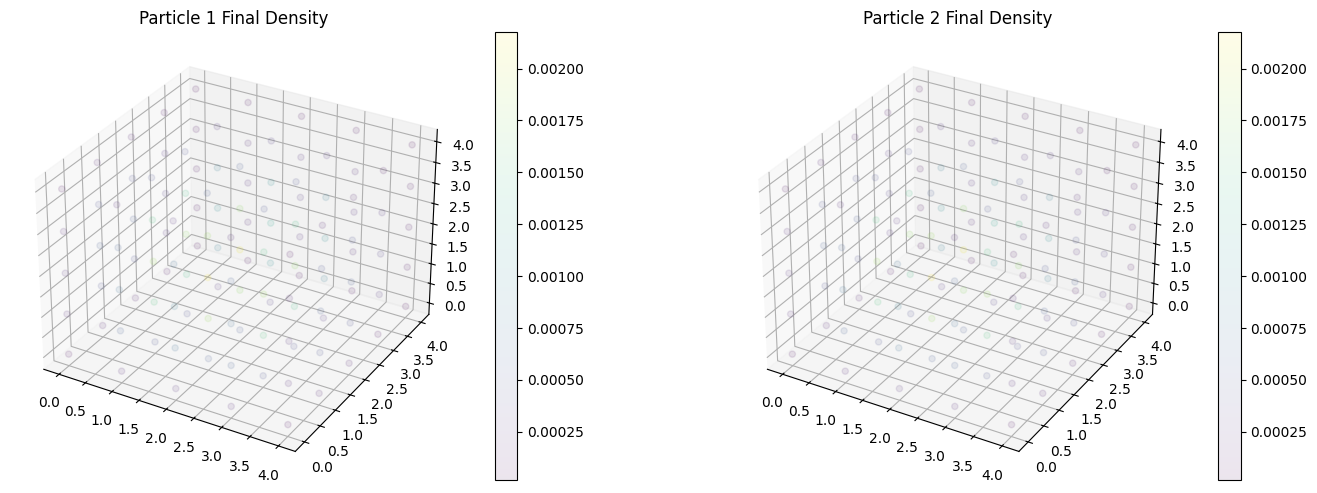

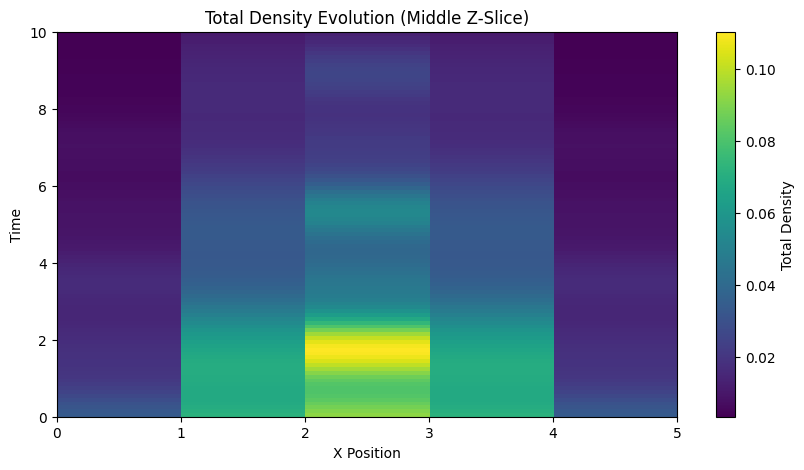

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from scipy.sparse import csr_matrix
import numba

@numba.jit(nopython=True)
def custom_potential(x, y, z, molecule_positions, atom_types):
    """
    Custom potential function for a molecular environment.
    Uses a simple Lennard-Jones potential for demonstration.
    """
    potential = 0
    epsilon_0 = 1e-10  # Small constant to prevent division by zero
    for pos, atom_type in zip(molecule_positions, atom_types):
        r_squared = (x - pos[0])**2 + (y - pos[1])**2 + (z - pos[2])**2
        r = np.sqrt(r_squared + epsilon_0)  # Add small constant to prevent division by zero
        if atom_type == 'C':
            epsilon, sigma = 0.1, 3.4  # Example parameters for carbon
        elif atom_type == 'O':
            epsilon, sigma = 0.2, 3.0  # Example parameters for oxygen
        else:
            epsilon, sigma = 0.05, 2.5  # Default parameters
        potential += 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
    return potential

@numba.jit(nopython=True)
def external_field(x, y, z, t, E0, omega):
    """
    Time-dependent external electric field.
    """
    return E0 * np.sin(omega * t) * x  # Field along x-direction

class AdvancedQuantumWalk3D:
    def __init__(self, grid_size, num_particles, interaction_strength, potential_function, 
                 decoherence_rate, external_field_function):
        self.grid_size = grid_size
        self.num_particles = num_particles
        self.interaction_strength = interaction_strength
        self.potential_function = potential_function
        self.decoherence_rate = decoherence_rate
        self.external_field_function = external_field_function
        self.hilbert_space_size = grid_size ** 3
        self.hamiltonian = self._create_hamiltonian()

    def _create_hamiltonian(self):
        total_size = self.hilbert_space_size * self.num_particles
        H = csr_matrix((total_size, total_size), dtype=complex)
        
        for p in range(self.num_particles):
            offset = p * self.hilbert_space_size
            for i in range(self.grid_size):
                for j in range(self.grid_size):
                    for k in range(self.grid_size):
                        idx = offset + i * self.grid_size**2 + j * self.grid_size + k
                        
                        # Kinetic energy terms (nearest-neighbor hopping)
                        for di, dj, dk in [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)]:
                            if 0 <= i+di < self.grid_size and 0 <= j+dj < self.grid_size and 0 <= k+dk < self.grid_size:
                                idx_neighbor = offset + (i+di) * self.grid_size**2 + (j+dj) * self.grid_size + (k+dk)
                                H[idx, idx_neighbor] = H[idx_neighbor, idx] = -1

                        # Potential energy term
                        H[idx, idx] += self.potential_function(i, j, k)

        # Inter-particle interaction terms
        for p1 in range(self.num_particles):
            for p2 in range(p1+1, self.num_particles):
                offset1 = p1 * self.hilbert_space_size
                offset2 = p2 * self.hilbert_space_size
                for i in range(self.hilbert_space_size):
                    H[offset1+i, offset2+i] = H[offset2+i, offset1+i] = self.interaction_strength

        return H

    def evolve(self, initial_state, t):
        def quantum_walk_ode(t, y):
            H_t = self.hamiltonian.copy()
            
            # Add time-dependent external field
            for p in range(self.num_particles):
                offset = p * self.hilbert_space_size
                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        for k in range(self.grid_size):
                            idx = offset + i * self.grid_size**2 + j * self.grid_size + k
                            H_t[idx, idx] += self.external_field_function(i, j, k, t)
            
            dy = -1j * (H_t.dot(y))
            
            # Add decoherence effects
            dy -= self.decoherence_rate * y
            
            return dy

        solution = solve_ivp(quantum_walk_ode, (t[0], t[-1]), initial_state, t_eval=t, method='RK45')
        return solution.y.T

# Simulation parameters
grid_size = 5  # Reduced from 20
num_particles = 2  # Reduced from 3
interaction_strength = 1.0
t_max = 10  
num_steps = 100  
decoherence_rate = 0.1
E0 = 0.5
omega = 2.0


# Define molecular structure (example: water molecule)
molecule_positions = np.array([(10, 10, 10), (11, 10, 11), (9, 10, 11)])  # Centered in the grid
atom_types = ['O', 'H', 'H']

# Create quantum walk object
qw = AdvancedQuantumWalk3D(
    grid_size, 
    num_particles, 
    interaction_strength, 
    lambda x, y, z: custom_potential(x, y, z, molecule_positions, atom_types),
    decoherence_rate,
    lambda x, y, z, t: external_field(x, y, z, t, E0, omega)
)

# Create initial state (Gaussian wave packets for each particle)
initial_state = np.zeros(qw.hilbert_space_size * num_particles, dtype=complex)
for p in range(num_particles):
    for i in range(grid_size):
        for j in range(grid_size):
            for k in range(grid_size):
                idx = p * qw.hilbert_space_size + i * grid_size**2 + j * grid_size + k
                initial_state[idx] = np.exp(-((i-grid_size//2)**2 + (j-grid_size//2)**2 + (k-grid_size//2)**2) / (2*2**2))
initial_state /= np.linalg.norm(initial_state)

# Evolve the system
t = np.linspace(0, t_max, num_steps)
solution = qw.evolve(initial_state, t)

# Calculate particle densities over time
particle_densities = np.zeros((num_particles, grid_size, grid_size, grid_size, num_steps))
for step in range(num_steps):
    state = solution[step]
    for p in range(num_particles):
        offset = p * qw.hilbert_space_size
        particle_state = state[offset:offset+qw.hilbert_space_size]
        particle_densities[p, :, :, :, step] = np.abs(particle_state.reshape(grid_size, grid_size, grid_size))**2

# Visualize results
fig = plt.figure(figsize=(15, 5))

for p in range(num_particles):
    ax = fig.add_subplot(1, num_particles, p+1, projection='3d')
    x, y, z = np.meshgrid(np.arange(grid_size), np.arange(grid_size), np.arange(grid_size))
    scatter = ax.scatter(x, y, z, c=particle_densities[p, :, :, :, -1].flatten(), cmap='viridis', alpha=0.1)
    ax.set_title(f'Particle {p+1} Final Density')
    plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Plot total density over time for a slice
plt.figure(figsize=(10, 5))
total_density = np.sum(particle_densities, axis=0)
plt.imshow(total_density[:, :, grid_size//2, :].sum(axis=0).T, aspect='auto', origin='lower', 
           extent=[0, grid_size, 0, t_max], cmap='viridis')
plt.colorbar(label='Total Density')
plt.title('Total Density Evolution (Middle Z-Slice)')
plt.xlabel('X Position')
plt.ylabel('Time')
plt.show()